About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





- **TfidfVectorizer** (Term Frequency-Inverse Document Frequency Vectorizer) là một phương pháp phổ biến để chuyển đổi văn bản thành vectơ số hóa dựa trên mức độ quan trọng của từng từ trong tài liệu so với toàn bộ tập dữ liệu. Nó thường được sử dụng trong xử lý ngôn ngữ tự nhiên (NLP) để biểu diễn văn bản dưới dạng số hóa, thích hợp cho việc huấn luyện mô hình học máy.

**TfidfVectorizer**: gồm 3 lý thuyết chính:

- **Term Frequency (TF)** là tần suất xuất hiện của một từ trong một văn bản.

$$
TF(t, d) = \frac{\text{Số lần xuất hiện của từ } t \text{ trong tài liệu } d}{\text{Tổng số từ trong tài liệu } d}
$$

- **Inverse Document Frequency (IDF)** là một chỉ số đo mức độ quan trọng của một từ trong toàn bộ tập dữ liệu:

$$
IDF(t, D) = \log \left( \frac{\text{Tổng số tài liệu trong tập dữ liệu } D}{\text{Số tài liệu chứa từ } t + 1} \right)
$$

- **TF-IDF Score:** là tích của TF và IDF. Nó đo mức độ quan trọng của một từ trong một tài liệu cụ thể so với toàn bộ tập dữ liệu.

$$
TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)
$$

Importing the Dependencies

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
# loading the dataset to a pandas DataFrame
path = 'https://drive.google.com/uc?id=1MWC1vJA_TOv3IsC-cduSSGCDLWrMulpr&export=download'
news_dataset = pd.read_csv(path)

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


#Trực quan hoá dữ liệu



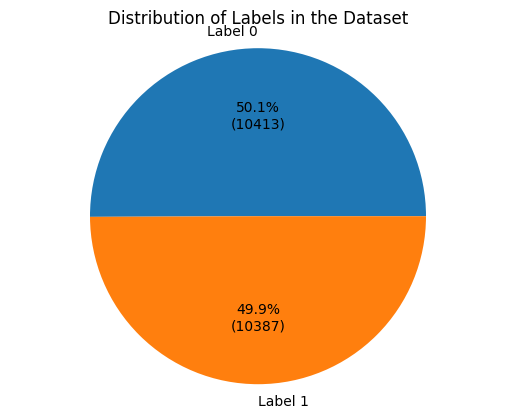

In [ ]:
label_counts = news_dataset['label'].value_counts()
labels = ['Label 0', 'Label 1']

plt.pie(label_counts, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(label_counts) / 100))
plt.axis('equal')  # Đảm bảo biểu đồ tròn được vẽ hợp lý
plt.title('Distribution of Labels in the Dataset')
plt.show()

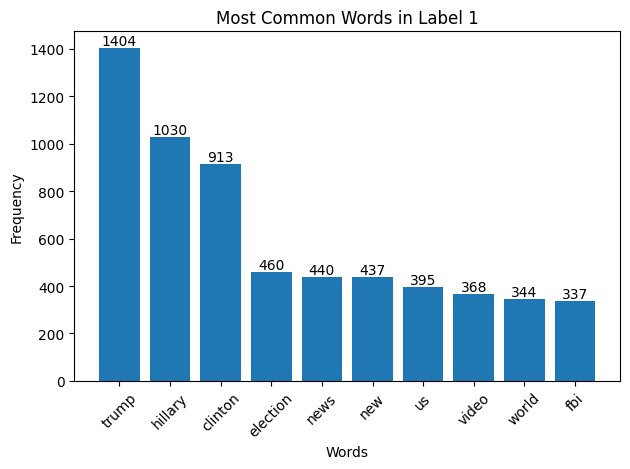

In [ ]:
# Lọc dữ liệu theo nhãn 1 (fake news)
label_1_data = news_dataset[news_dataset['label'] == 1]

# Xử lý văn bản và tính toán tần suất từ
all_words = []
stop_words = set(stopwords.words('english'))

for text in label_1_data['content']:
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    all_words.extend(words)

word_freq = Counter(all_words)

# Top 10 từ xuất hiện nhiều nhất
most_common_words = word_freq.most_common(10)

words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]

# Vẽ biểu đồ cột
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Label 1')
plt.xticks(rotation=45)  # Xoay tên các từ để tránh trùng lắp
plt.tight_layout()  # Đảm bảo tên các từ không bị cắt
# Hiển thị số lượng trực tiếp lên mỗi cột
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10)
plt.show()

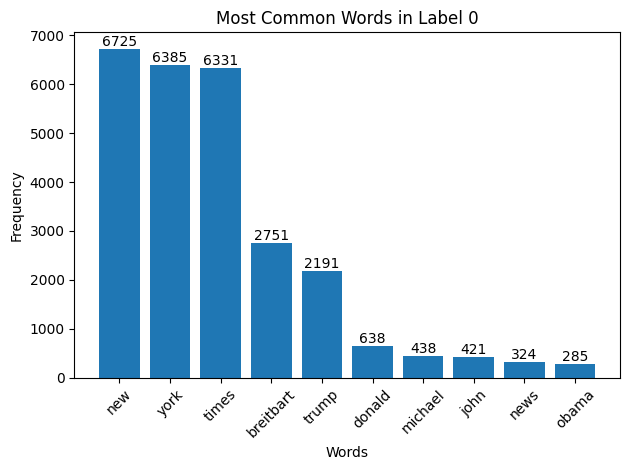

In [ ]:
# Lọc dữ liệu theo nhãn 0 (real news)
label_0_data = news_dataset[news_dataset['label'] == 0]

# Xử lý văn bản và tính toán tần suất từ
all_words = []
stop_words = set(stopwords.words('english'))

for text in label_0_data['content']:
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    all_words.extend(words)

word_freq = Counter(all_words)

# Top 10 từ xuất hiện nhiều nhất
most_common_words = word_freq.most_common(10)

words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]

# Vẽ biểu đồ cột
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Label 0')
plt.xticks(rotation=45)  # Xoay tên các từ để tránh trùng lắp
plt.tight_layout()  # Đảm bảo tên các từ không bị cắt
# Hiển thị số lượng trực tiếp lên mỗi cột
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10)
plt.show()

In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  (2, 15611)	0.41544962664721613
  (2, 2943)	0.3179886800654691
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.295420

# Ghép X và Y là 1 df, sau đó vẽ 1 biểu đồ phân phối của lớp 0 và 1.

In [ ]:
# Tạo DataFrame mới
data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
data['label'] = Y
data.head()

,aa,aaa,aap,aapi,aargh,aaron,ab,abad,abandon,abandona,...,zumwalt,zur,zuschraubt,zvezda,zw,zweden,zweit,zwo,zwyghuizen,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


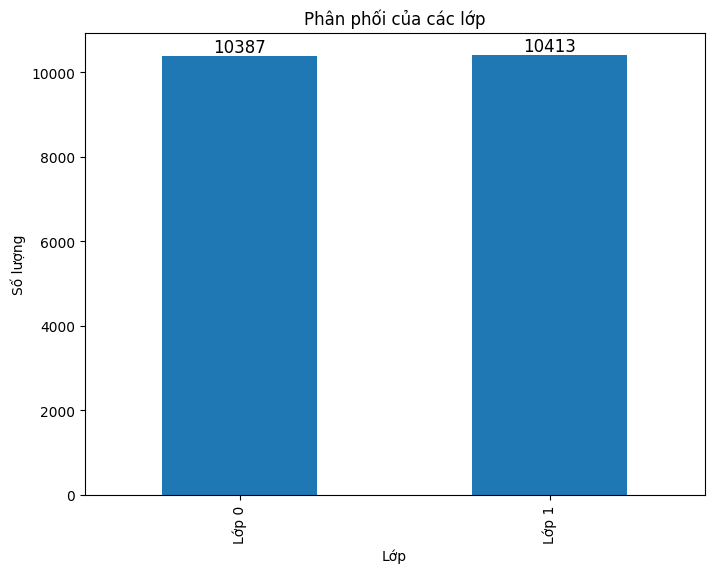

In [ ]:
# Tạo biểu đồ phân phối
plt.figure(figsize=(8, 6))
class_counts = data['label'].value_counts().sort_index()
class_counts.plot(kind='bar')

for index, value in enumerate(class_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Phân phối của các lớp')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.xticks([0, 1], ['Lớp 0', 'Lớp 1'])
plt.show()

Splitting the dataset to training & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

Training the Model: Logistic Regression

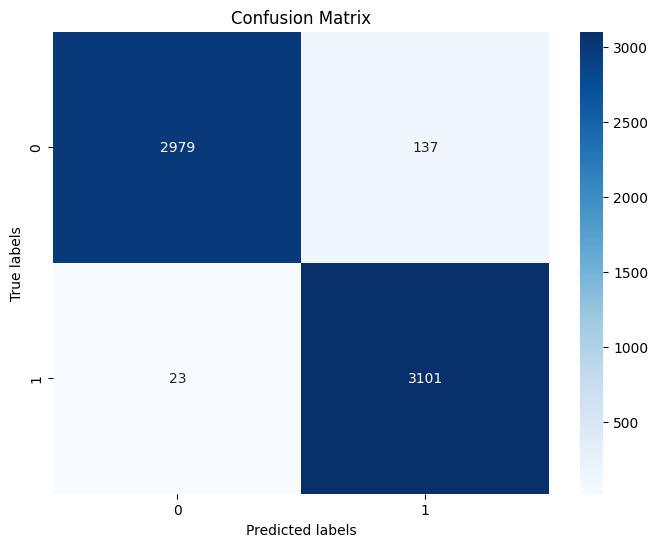

Accuracy score of the training data :  0.9850961538461539
Accuracy score of the test data :  0.9743589743589743


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

Y_train_pre_logi = logistic_model.predict(X_train)
Y_test_pre_logi = logistic_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pre_logi)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6)) #định nghĩa kích thước hình vẽ rộng 8, cao 6 inch
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# accuracy score on the training data
training_data_accuracy_logistic_model = accuracy_score(Y_train_pre_logi, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_logistic_model)
# accuracy score on the test data
test_data_accuracy_logistic_model = accuracy_score(Y_test_pre_logi, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_logistic_model)


Training the Model: Decision Tree

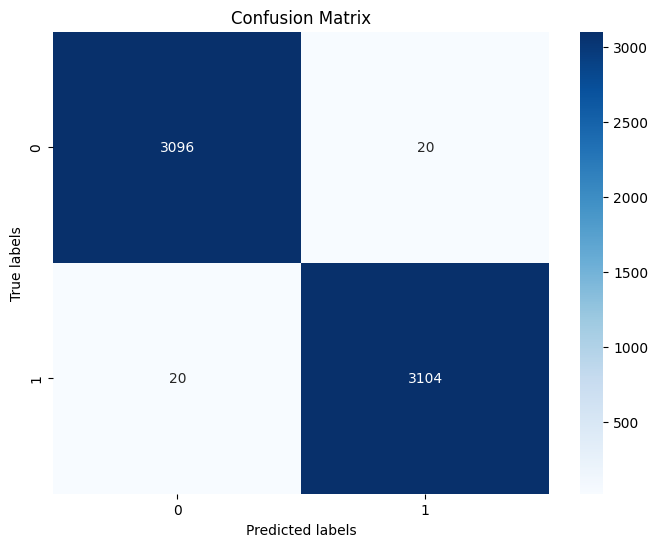

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.9935897435897436


In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

Y_train_pre_tree = decision_tree_model.predict(X_train)
Y_test_pre_tree = decision_tree_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pre_tree)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6)) #định nghĩa kích thước hình vẽ rộng 8, cao 6 inch
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# accuracy score on the training data
training_data_accuracy_tree_model = accuracy_score(Y_train_pre_tree, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_tree_model)
# accuracy score on the test data
test_data_accuracy_tree_model = accuracy_score(Y_test_pre_tree, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_tree_model)

Training the Model: Multinomial Naive Bayes

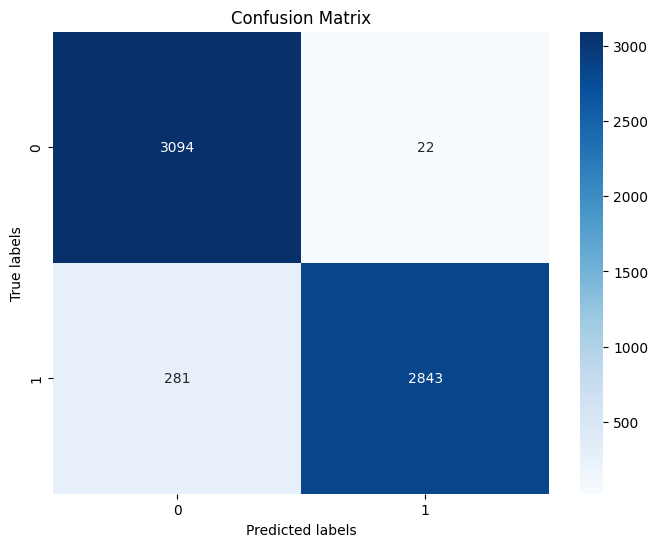

Accuracy score of the training data :  0.979739010989011
Accuracy score of the test data :  0.9514423076923076


In [ ]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, Y_train)

Y_train_pre_naive = naive_bayes_model.predict(X_train)
Y_test_pre_naive = naive_bayes_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pre_naive)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6)) #định nghĩa kích thước hình vẽ rộng 8, cao 6 inch
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# accuracy score on the training data
training_data_accuracy_naive_model = accuracy_score(Y_train_pre_naive, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_naive_model)
# accuracy score on the test data
test_data_accuracy_naive_model = accuracy_score(Y_test_pre_naive, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_naive_model)

# Vẽ 1 biểu đồ so sánh kết quả của các mô hình tìm ra mô hình tốt nhất rồi ghi kết luận


> Kết luận:

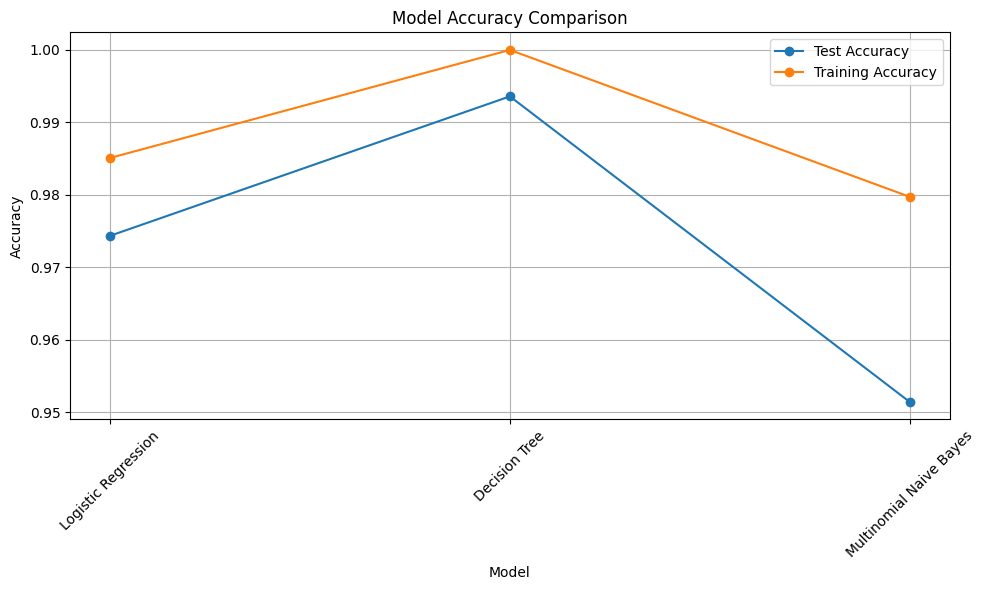


The best training model is Decision Tree with test accuracy of 1.00
The best test model is Decision Tree with test accuracy of 0.99


In [ ]:
# List of model names and their corresponding accuracy scores on the test data
model_names = ['Logistic Regression', 'Decision Tree', 'Multinomial Naive Bayes']

# Accuracy scores on test data
test_accuracy_scores = [test_data_accuracy_logistic_model, test_data_accuracy_tree_model, test_data_accuracy_naive_model]

# Accuracy scores on training data
training_accuracy_scores = [training_data_accuracy_logistic_model, training_data_accuracy_tree_model, training_data_accuracy_naive_model]

# Create a scatter plot to compare model accuracies
plt.figure(figsize=(10, 6))

plt.plot(model_names, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.plot(model_names, training_accuracy_scores, marker='o', label='Training Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Find the index of the best train model
best_train_model_index = training_accuracy_scores.index(max(training_accuracy_scores))
best_train_model_name = model_names[best_train_model_index]
print(f"\nThe best training model is {best_train_model_name} with test accuracy of {max(training_accuracy_scores):.2f}")
# Find the index of the best test model
best_test_model_index = test_accuracy_scores.index(max(test_accuracy_scores))
best_test_model_name = model_names[best_test_model_index]
print(f"The best test model is {best_test_model_name} with test accuracy of {max(test_accuracy_scores):.2f}")

